In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def decompose_LU_hessenberg(A):
    """
    Функция, производящая LU разложение матрицы A
    """

    w, h = A.shape
    if w != h:
        raise ValueError("Матрица не квадратная")
    n = w

    L, U = np.zeros((n, n), float), np.zeros((n, n), float)

    # i = 0 Первая строка матрицы U
    for j in range(n):
        U[0, j] = A[0, j]

    # j = 0 Первый столбец матрицы L
    for i in range(n):
        L[i, 0] = A[i, 0] / U[0, 0]

    # i = j Диагональ матрицы L
    for index in range(n):
        L[index, index] = 1

    # Остальные эллементы матриц L и U
    for i in range(1, n):
        for j in range(1, min(n, i + 2)):
            if i <= j:
                U[i, j] = A[i, j]
                for k in range(i):
                    U[i, j] -= L[i, k] * U[k, j]

            else:
                L[i, j] = A[i, j]
                for k in range(j):
                    L[i, j] -= L[i, k] * U[k, j]
                L[i, j] /= U[j, j]

    return L, U

In [5]:
def householder_reflection(a):
    """Создает отражение Хаусхолдера для вектора a."""
    norm_a = np.linalg.norm(a)
    sign = -1 if a[0] < 0 else 1
    u1 = a[0] + sign * norm_a
    u = a.copy()
    u[0] = u1
    u[1:] = a[1:]
    u /= np.linalg.norm(u)
    return u

In [6]:
def hessenberg(A):
    """Преобразует произвольную матрицу A в матрицу Хессенберга с сохранением собственных значений."""
    A = A.astype(float).copy()  # создаем копию матрицы, чтобы не изменять исходную
    n = A.shape[0]
    
    for k in range(n - 2):
        # Выбираем подстолбец начиная с k+1
        x = A[k+1:n, k]
        u = householder_reflection(x)

        # Формируем матрицу отражения
        H = np.eye(n)
        H[k+1:n, k+1:n] -= 2 * np.outer(u, u)

        # Обновляем A
        A = H @ A @ H

    return A

In [7]:
def compose(L, U):
    n = L.shape[0]

    A = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n - 1):
            A[i, j] = U[i, j] + U[i, j + 1] * L[j + 1, j]

    for i in range(1, n):
        A[i, i - 1] = U[i, i] * L[i, i - 1]

    for i in range(n):
        A[i, n - 1] = U[i, n - 1]

    return A


In [8]:
def LU_eig(A0, eps):
    A0 = hessenberg(A0)
    A = A_old = A0
    n = A.shape[0]

    index = 0

    while True:
        L, U = decompose_LU_hessenberg(A)
        A = compose(L, U)

        if np.sum(np.abs([A[i] - A_old[i] for i in range(n)])) < eps:
            break

        index += 1

        A_old = A
    
    return np.diag(A)

In [9]:
A = np.random.rand(5, 5) * 5
# A = A.T @ A

In [10]:
np.sort(np.round(LU_eig(A, 0.01), 3))

KeyboardInterrupt: 

In [318]:
np.sort(np.round(np.linalg.eig(A).eigenvalues, 3))

array([-3.657+0.j   , -0.517-1.136j, -0.517+1.136j,  3.245+0.j   ,
       13.672+0.j   ])

In [319]:
np_lambdas = [[], [], []]
lambdas = [[], [], []]
X = [i for i in range(1, 31)]

deltas = []

for i in range(30):
    A = np.random.rand(3, 3) * 1

    for index, np_lambd in enumerate(np.sort(np.linalg.eig(A).eigenvalues)):
        np_lambdas[index].append(np_lambd)

    for index, lambd in enumerate(np.sort(LU_eig(A, 0.001))):
        lambdas[index].append(lambd)

    deltas.append(np.sqrt(np.sum([(np_lambdas[_][i] - lambdas[_][i]) ** 2 for _ in range(3)])))

KeyboardInterrupt: 

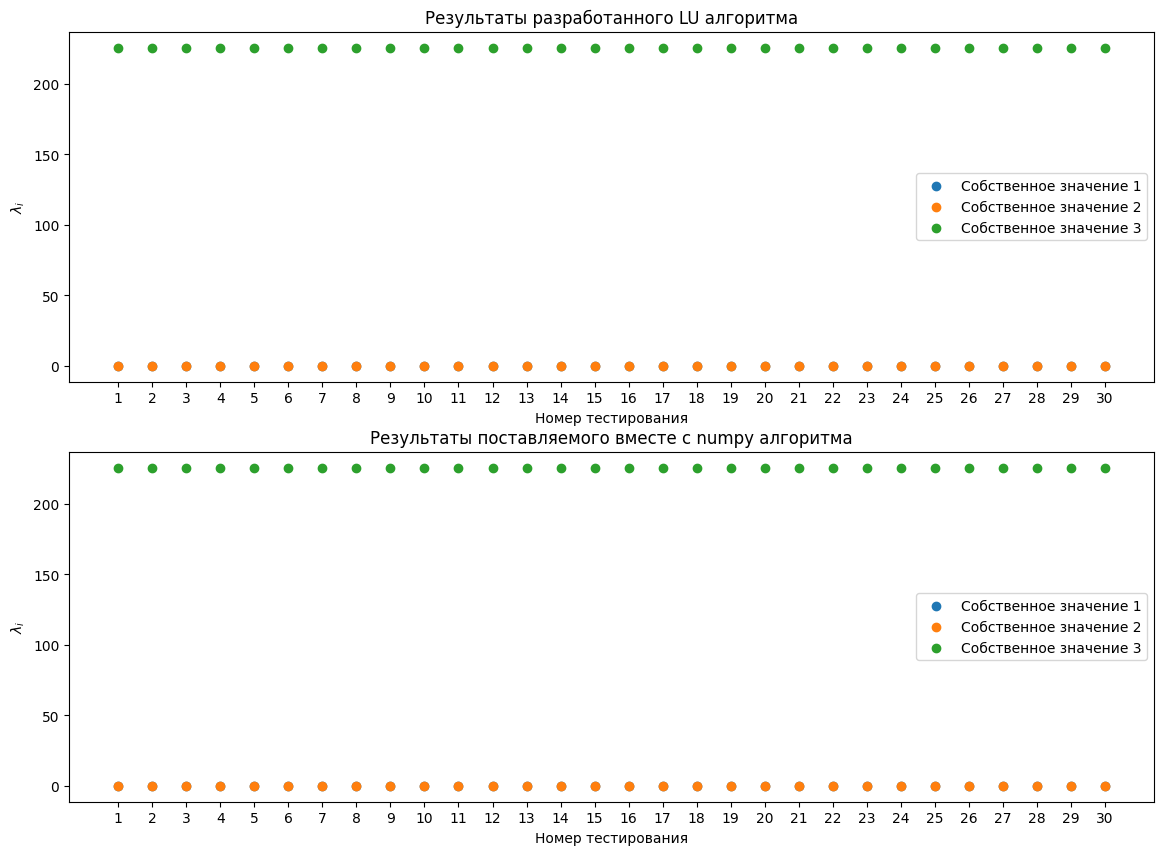

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)

for i in range(3):
    plt.scatter(X, lambdas[i], label=f'Собственное значение {i + 1}')

plt.xticks([i for i in range(1, 31)])
plt.ylabel('$\\lambda_i$')
plt.xlabel('Номер тестирования')

plt.title('Результаты разработанного LU алгоритма')
plt.legend()

plt.subplot(2, 1, 2)

for i in range(3):
    plt.scatter(X, np_lambdas[i], label=f'Собственное значение {i + 1}')

plt.xticks([i for i in range(1, 31)])
plt.ylabel('$\\lambda_i$')
plt.xlabel('Номер тестирования')

plt.title('Результаты поставляемого вместе с numpy алгоритма')
plt.legend()

plt.savefig('two_algorytms.png', dpi=300, bbox_inches='tight')
plt.show()

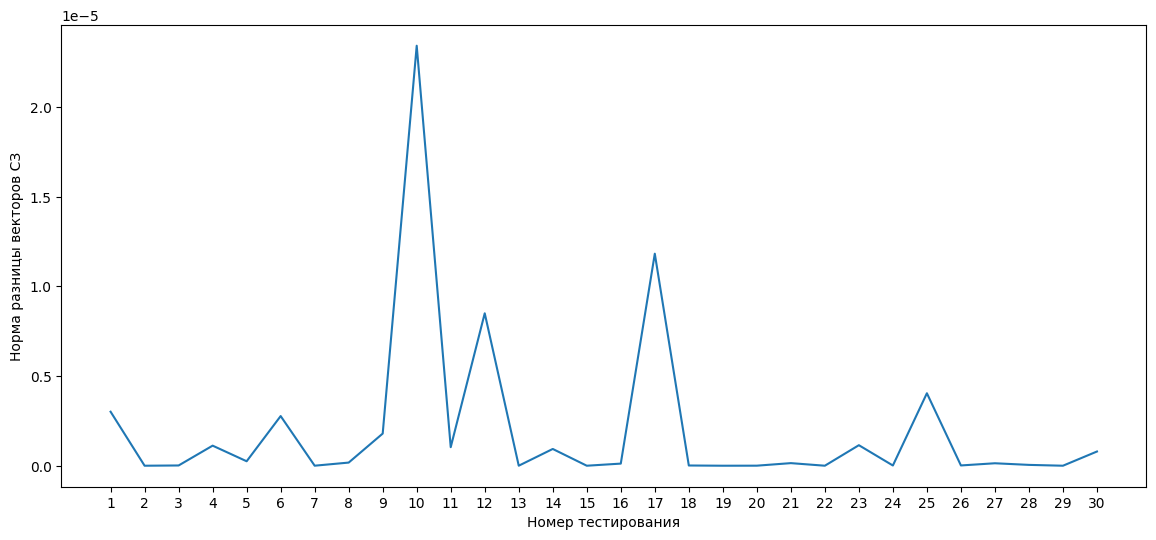

In [269]:
plt.figure(figsize=(14, 6))

plt.plot(X, deltas)

plt.xticks([i for i in range(1, 31)])
plt.ylabel('Норма разницы векторов СЗ')
plt.xlabel('Номер тестирования')

# plt.title('График норм разности между векторами собственных значений двух алгоритмов')

plt.savefig('two_algorytms_deltas.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
size1_lambdas = []
eps_lambdas = []

sizes = [i for i in range(3, 40, 2)]
eps = np.arange(0.0001, 0.1, 0.001)

for size in sizes:
    A = np.random.rand(size, size)
    A = A.T @ A
    
    size1_lambdas.append(LU_eig(A, 0.01))
    
A = np.random.rand(5, 5)
A = A.T @ A

for eps_ in eps:
    eps_lambdas.append(LU_eig(A, eps_))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (19,) + inhomogeneous part.

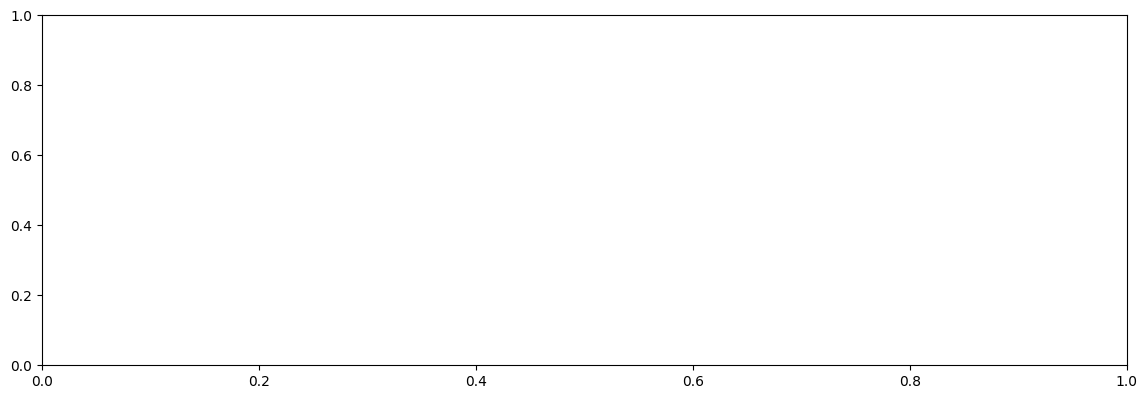

In [271]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)

plt.plot(sizes, size1_lambdas)

plt.ylabel('Число итераций')
plt.xlabel('Размер матрицы')
plt.xticks(sizes)

plt.title('Зависимость числа итераций от размера матрицы')

plt.subplot(2, 1, 2)

plt.plot(eps, eps_lambdas)

plt.ylabel('Число итераций')
plt.xlabel('Точность')

plt.title('Зависимость числа итераций от заданной точности')

plt.savefig('iter_per_eps_and_size.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
import time

In [12]:
size_lambdas = []

sizes = [i for i in range(3, 40, 2)]

for size in sizes:
    A = np.random.rand(size, size)
    A = A.T @ A
    
    start = time.time()
    LU_eig(A, 0.01)
    end = time.time()

    size_lambdas.append(end - start)

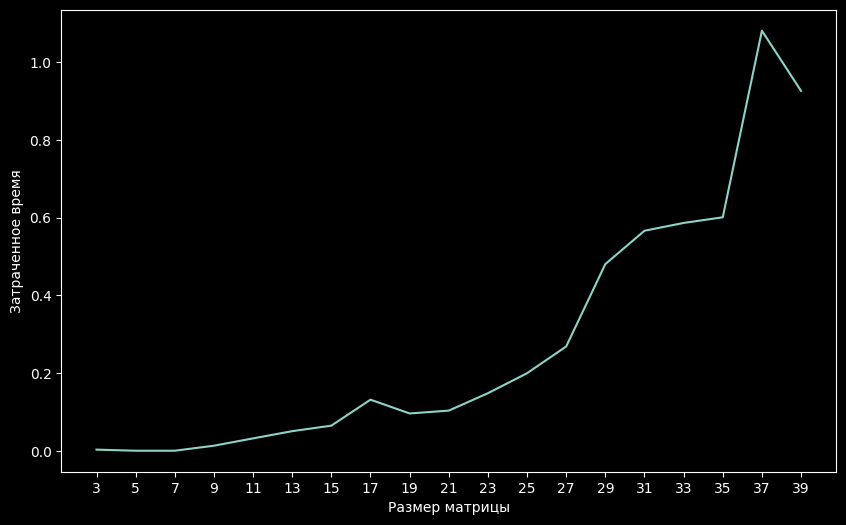

In [13]:
plt.figure(figsize=(10, 6))

plt.plot(sizes, size_lambdas)

plt.ylabel('Затраченное время')
plt.xlabel('Размер матрицы')
plt.xticks(sizes)

plt.savefig('time_per_size.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1200x600 with 0 Axes>

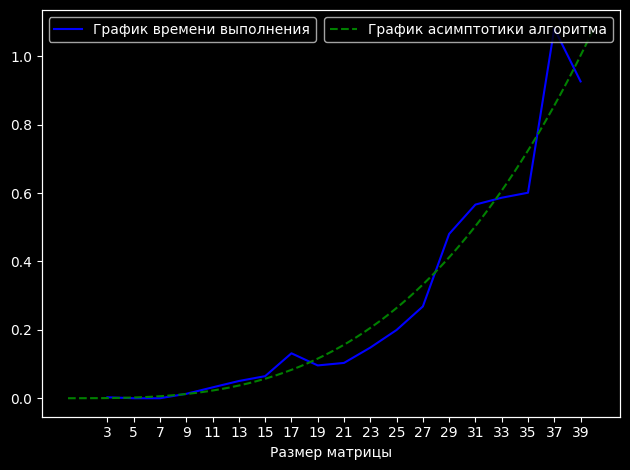

In [15]:
plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots()

ax1.plot(sizes, size_lambdas, color='blue', label='График времени выполнения')

ax1.set_xlabel('Размер матрицы')
ax1.set_xticks(sizes)
# ax1.set_yticks([])
# ax1.legend()

ax2 = ax1.twinx() 

x = np.linspace(0, 40, 1000)

ax2.plot(x, x ** 3, color='green', linestyle='--', label='График асимптотики алгоритма')
ax2.set_yticks([])

ax1.legend(loc='upper left')  
ax2.legend(loc='upper right')

fig.tight_layout()

plt.savefig('time_per_size_with_acympt.png', dpi=300, bbox_inches='tight')
plt.show()